<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Inception_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
# Connecting to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing tensor resources abd configuartion parameters
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the tensor flow and keras ibraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
#Some of the common python libraries and modelus related to project
import os
import pandas as pd
import numpy as np
from numpy import expand_dims
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from IPython.display import SVG
from tensorflow import keras
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model

# **Data Pre-Processing and Model Implementation**

In [6]:
# train and test images paths 
train_data_dir = ('/content/drive/MyDrive/Newfolder/Train_data/')
validation_data_dir =  ('/content/drive/MyDrive/Newfolder/Test_data/')
# resize all images in this size
IMAGE_SIZE = [224, 224]

In [8]:
# calling Inception V3 model 
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 0s 0us/step


In [9]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
#glob is a pyhon module used for getting number of output classes
folders = glob('/content/drive/MyDrive/Newfolder/Train_data/*')

In [11]:
# calling respective python libraries and layers using keras.
# Also we can add more layers to increase complexicity.
from keras import models
from keras import layers
from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
model = models.Sequential()
model.add(inception) # add pre_trained layers
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.4))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))

# Flattern layer for previous inception you can add more if you want
x = Flatten()(inception.output)

In [12]:
# last year in model with the softmax activation function
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# view the structure of the model
model.summary

In [14]:
# importing optimizers 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [15]:
#Use the Image Data Generator to import the images from the dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# We have to make sure you provide the same target size as initialied for the image size.
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Newfolder/Train_data/',
                                                 target_size = (224, 224), 
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 6000 images belonging to 120 classes.


In [17]:
# Test data
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Newfolder/Test_data/',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 16126 images belonging to 120 classes.


In [19]:
# fiting the inception model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  epochs=10
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
94/94 [==============================] - 6692s 72s/step - loss: 7.8720 - accuracy: 0.6235 - val_loss: 5.7667 - val_accuracy: 0.7348
Epoch 2/10
94/94 [==============================] - 119s 1s/step - loss: 3.7173 - accuracy: 0.8018 - val_loss: 5.8244 - val_accuracy: 0.7636
Epoch 3/10
94/94 [==============================] - 119s 1s/step - loss: 3.0758 - accuracy: 0.8420 - val_loss: 7.0220 - val_accuracy: 0.7565
Epoch 4/10
94/94 [==============================] - 119s 1s/step - loss: 2.6122 - accuracy: 0.8633 - val_loss: 6.3543 - val_accuracy: 0.7826
Epoch 5/10
94/94 [==============================] - 120s 1s/step - loss: 2.1656 - accuracy: 0.8872 - val_loss: 6.9978 - val_accuracy: 0.7828
Epoch 6/10
94/94 [==============================] - 120s 1s/step - loss: 1.7762 - accuracy: 0.9090 - val_loss: 7.6441 - val_accuracy: 0.7774
Epoch 7/10
94/94 [==============================] - 120s 1s/step - loss: 1.6854 - accuracy: 0.9133 - val_loss: 7.7614 - val_accuracy: 0.7906
Epoch 8/10


# **Results**

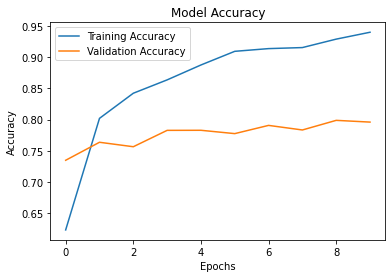

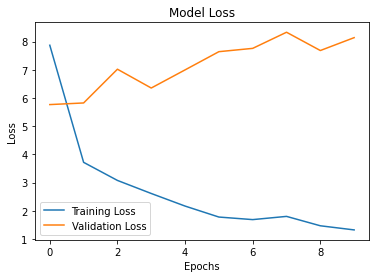

In [21]:
# Plotting graphs for Model and validation Accuracy
plt.subplot()
plt.title('Model Accuracy')
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.savefig('baseline_acc_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

plt.title('Model Loss')
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])
plt.savefig('baseline_loss_epoch.png', transparent= False, bbox_inches= 'tight', dpi= 900)
plt.show()

In [22]:
from tensorflow.keras.models import load_model
model.save('model_inception.h5')

In [ ]:
model = tf.keras.models.load_model('model_inception.h5')
class_dict = training_set.class_indices
class_dict

In [49]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array #/ 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)


In [67]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

In [74]:
import matplotlib as plt
prediction = model.predict([prepare('/content/drive/MyDrive/Newfolder/Test_data/Boxer/n02108089_1619-0.jpg')])
prediction_cls(prediction)

'Boxer'

In [81]:
import matplotlib as plt
predictio = model.predict([prepare('/content/drive/MyDrive/Newfolder/Test_data/Dhole/n02115913_2253-0.jpg')])
prediction_cls(predictio)

'Dhole'

In [99]:
import matplotlib as plt
predictio = model.predict([prepare('/content/drive/MyDrive/Newfolder/Test_data/Saluki/n02091831_1696-1.jpg')])
prediction_cls(predictio)

'Saluki'

In [80]:

import matplotlib as plt
predictio = model.predict([prepare('/content/drive/MyDrive/Newfolder/Test_data/English Setter/n02100735_3566-1.jpg')])
prediction_cls(predictio)


'Boxer'

In [70]:
import matplotlib as plt
prediction = model.predict([prepare('/content/drive/MyDrive/Newfolder/Test_data/Appenzeller/n02107908_298-0.jpg')])
prediction_cls(prediction)

'Yorkshire Terrier'

**Accuracy**

In [23]:
score = model.evaluate(test_set,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

252/252 [==============================] - 50s 196ms/step - loss: 8.1417 - accuracy: 0.7959
Accuracy: 79.59%
Loss:  8.141740798950195


**F1 Measure**

In [24]:
from sklearn.metrics import f1_score

In [27]:
f_score = f1_score(test_set.classes,y_pred,average='macro')
print('F1 score:',f_score)

F1 score: 0.007569811951129359


**Confusion Matrix**

Confusion Matrix


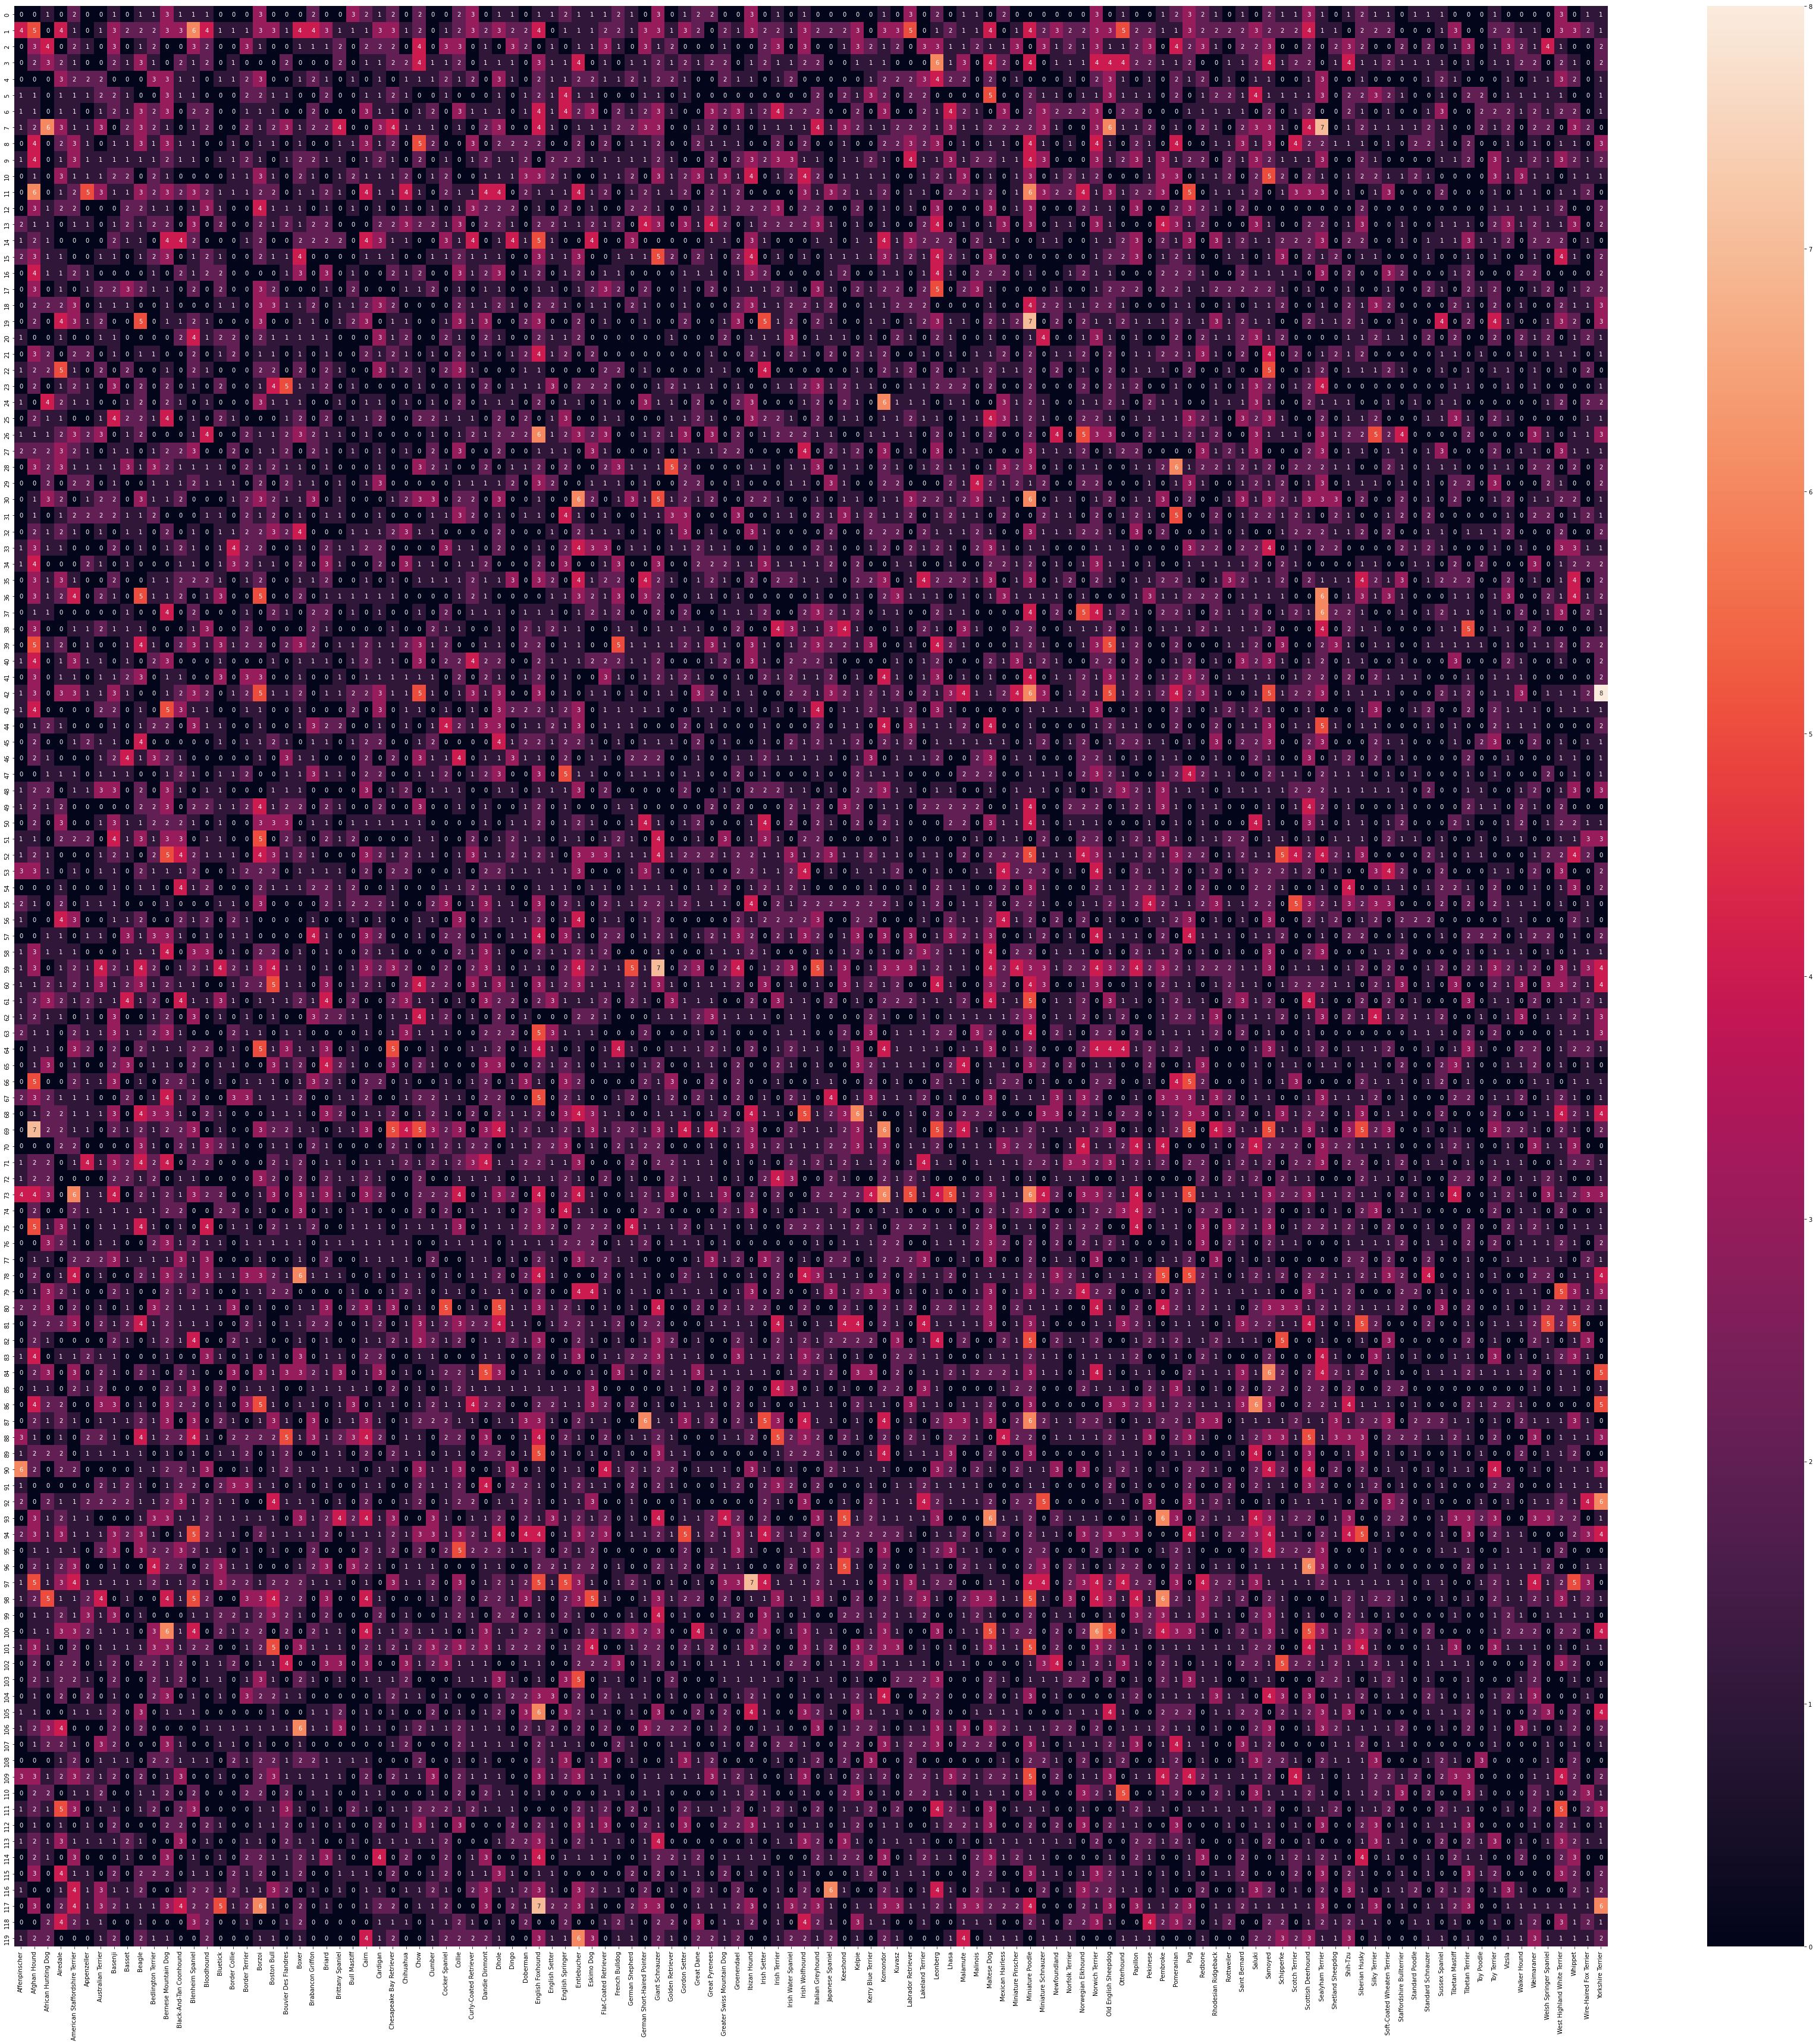

In [46]:
import seaborn as sn
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
df = pd.DataFrame(cm, columns=test_set.class_indices)
plt.figure(figsize=(60,60))
sn.heatmap(df, annot=True)